> 이 문서의 폰트크기는 브라우저 인쇄시 인쇄 배율 80%로 최적화 되어 있음

# 2변수 함수의 기울기 강하 기법 

> 1. 예제 함수
> 2. 함수 그리기
> 3. 함수의 등고선 그리기
> 4. 함수의 그래디언트 그리기
> 5. 기울기 강하 궤적 그리기

In [11]:
# multi line 출력을 위한 셀 -- 필요없으면 아래 두 라인을 주석(#) 처리해서 기능 해제
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

In [12]:
# 팝업 창을 띠우지 않고 주피터 노트북 안에 그림을 그리라는 명령
%matplotlib inline  

import sys, os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# 1. 예제 함수
####  예제 2변수 함수 
  - $y = x_0^2 +2x_1^2$

In [13]:
def ex_fn(X):
    """
    :param X: 변수배열, 2차원 [[ ],[ ]]
    :return: 함수값
    """
    return X[0]**2 + 2*X[1]**2

fig_label1 = '<< $x_0^2 + 2x_1^2$ >>'

# 실습할 예제 함수 및 라벨 설정

fig_label = fig_label1

#### 위 예제 함수에 대한 미분
  - $y ' = 2x_0 +4x_1$

In [14]:
def ex_fn_diff(X):
    """
    :param X: 변수배열, 2차원 [[ ],[ ]]
    :return: 미분값
    """
    grad = np.zeros_like(X)
    grad[0] = 2*X[0]
    grad[1] = 4*X[1]
    
    return grad

# 2.  함수 그리기

In [15]:
#각 그리드 점(x0, x1)별 f(x0, x1)값 구하기
xx0 = np.arange(-2, 2.5, 0.25)
xx1 = np.arange(-2, 2.5, 0.25)

x0, x1 = np.meshgrid(xx0, xx1)
y = ex_fn(np.array([x0, x1]))

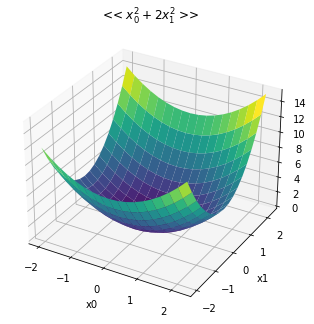

In [16]:
# 예제 함수 그리기
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(x0, x1, y, rstride=1, cstride=1, cmap=cm.viridis)
plt.xlabel('x0')
plt.ylabel('x1')
plt.title(fig_label)
plt.show()

# 3. 함수의 등고선(Contour graph) 그리기


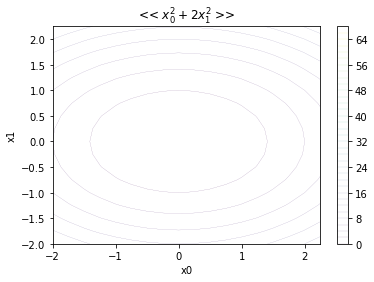

In [17]:
fig = plt.figure()
plt.contour(x0, x1, y, np.arange(0,70,2), linewidths=np.arange(0.1, 0.2, 0.1))
plt.colorbar()
plt.xlabel('x0')
plt.ylabel('x1')

plt.title(fig_label)
plt.show()

# 4. 함수의 그래디언트 그리기

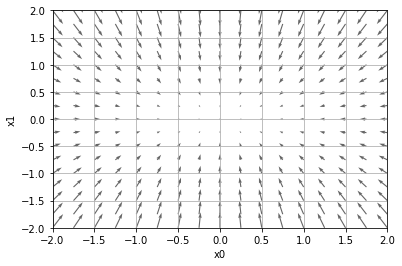

In [18]:
x0 = x0.flatten()
x1 = x1.flatten()

grad = ex_fn_diff(np.array([x0, x1]))

plt.figure()
plt.quiver(x0, x1, -grad[0], -grad[1], angles="xy",color="#666666")
                        
plt.xlim([-2, 2.0])
plt.ylim([-2, 2.0])

plt.xlabel('x0')
plt.ylabel('x1')
#plt.title(fig_label)
plt.grid()
# plt.legend()
plt.draw()

plt.show()

## 5. 기울기 강하 알고리즘 실행 후 궤적 그리기

In [19]:
def gradient_descent(fn, fn_diff, init_x, lr=0.01, steps=100):
    """
    :fn      :  함수
    :fn_diff :  미분함수
    :init_x  :  기울기 하강을 시작할 맨 처음 좌표값(initial coordinate)
    :return  :  기울기 하강 알고리즘 수행후 맨마지막 좌표, 그간 경로(좌표 목록)
    """
    x = init_x
    x_path = []

    for i in range(steps):
        x_path.append(x.copy())

        grad = fn_diff(x)
        x = x - lr * grad

    return x, np.array(x_path)

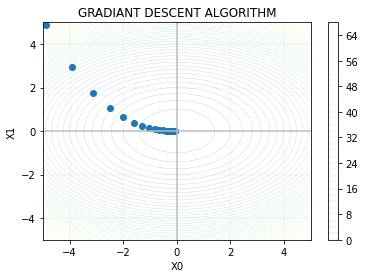

In [20]:
# -----------------------------------------------------------
#  Gradient descent 수행후 궤적 저장하기
# -----------------------------------------------------------
INIT_X = np.array([-4.9, 4.9])
LR = 0.1
STEPS = 20

x, x_history = gradient_descent(ex_fn, ex_fn_diff, INIT_X, lr=LR, steps=STEPS)

# -----------------------------------------------------------
#  함수 fn1(x0, x1)을 등고선(Contour graph) 형태로 그리기
# -----------------------------------------------------------
# ---- 각 그리드 점(x0, x1)별 f(x0, x1)값 구하기
xx0 = np.arange(-5, 5, 0.1)
xx1 = np.arange(-5, 5, 0.1)
x0, x1 = np.meshgrid(xx0, xx1)
y = ex_fn(np.array([x0, x1]))

# ----- 등고선 그리기
plt.contour(x0, x1, y, np.arange(0,70,2.0), linewidths=np.arange(0.1, 0.2, 0.1))
plt.colorbar()

# -----------------------------------------------------------
#  기울기 하강 경로 그리기 및 화면에 표시하기
# -----------------------------------------------------------
plt.plot(x_history[:, 0], x_history[:, 1], 'o')

plt.grid(color='#BDBDBD', linestyle='--', linewidth=0.2 )
plt.plot([-5, 5], [0, 0], '#BDBDBD')  # x-축 라인
plt.plot([0, 0], [-5, 5], '#BDBDBD')  # y-축 라인
plt.title("GRADIANT DESCENT ALGORITHM")
plt.xlim(-5.0, 5.0)
plt.ylim(-5.0, 5.0)
plt.xlabel("X0")
plt.ylabel("X1")

plt.show()